# Machine Learning Lab 5 "SOLUTIONS"

Classification and group coding exercise.

## Imports

In [1]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from classifiers import k_nearest_neighbour # the K-NN python file in the 'classifiers' folder
from classifiers import random_classifier # the Random Classifier python file in the 'classifiers' folder

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
# Loading dataset
dataset = load_iris()
X = dataset.data
y = dataset.target

## Random Classifier

In [3]:
# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2, # 20% test / 80% traing
                                                    random_state=1, # fixed random seed
                                                    stratify=y # split dataset proportional to classes
                                                   )

# Instantiating model
model = random_classifier.RandomClassifier()

# Training model
model = model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[5 1 4]
 [3 1 6]
 [5 3 2]]

Accuracy (Testing):  0.27 


## Bespoke K-NN

In [4]:
# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2, # 20% test / 80% traing
                                                    random_state=1, # fixed random seed
                                                    stratify=y # split dataset proportional to classes
                                                   )

# Instantiating model
model = k_nearest_neighbour.KNNClassifier(k=3)

# Training model
model = model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Accuracy (Testing):  0.97 


## Evaluation

Lab tasks on hold-out and cross-validation, etc.

Doing this on the ``wine`` dataset only.

In [5]:
# Loading dataset
dataset = load_wine()
X = dataset.data
y = dataset.target

# Converting into a Pandas DataFrame
wine_df = pd.DataFrame(data= np.c_[X, y], columns= dataset['feature_names'] + ['target'])

# Converting the target column to int (from float)
wine_df['target'] = pd.to_numeric(wine_df['target'], downcast='integer')

# Printing out the top 5 rows of the DataFrame
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [8]:
wine_df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [9]:
# Styled value counts output
# 1: Sorting index, to get order of 0, 1, 2
# 2: Converting to a pandas dataframe
# 3: Styling it as a bar, setting the min and max ranges

wine_df['target'].value_counts().sort_index(ascending=True).to_frame().style.bar(vmin=0, vmax=len(wine_df))

<Axes: xlabel='target', ylabel='Frequency'>

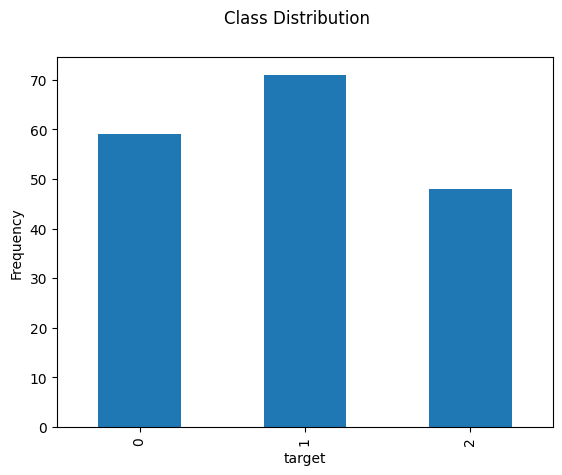

In [10]:
plt.figure()
plt.suptitle('Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Class')
wine_df['target'].value_counts().sort_index(ascending=True).plot(kind="bar")

### Hold-out validation

In [11]:
# Instantiating model
model = random_classifier.RandomClassifier()

# Hold-out-validation
accuracy_list_random = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_random = np.append(accuracy_list_random, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_random.mean(), accuracy_list_random.std() * 2))

Accuracy:  0.34 (+/- 0.18)


In [12]:
# Instantiating model
k = 10
model = k_nearest_neighbour.KNNClassifier(k=k)

# Hold-out-validation
accuracy_list_knn_bespoke = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_knn_bespoke = np.append(accuracy_list_knn_bespoke, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_bespoke.mean(), accuracy_list_knn_bespoke.std() * 2))


Accuracy:  0.71 (+/- 0.11)


In [13]:
# Instantiating model
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# Hold-out-validation
accuracy_list_knn_sklearn = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_knn_sklearn = np.append(accuracy_list_knn_sklearn, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_sklearn.mean(), accuracy_list_knn_sklearn.std() * 2))

Accuracy:  0.69 (+/- 0.16)


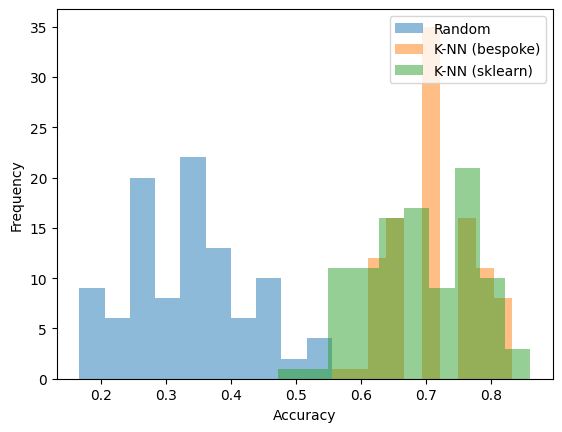

In [14]:
# plotting a histogram of the accuracy for the 3 classifiers
plt.figure()
plt.hist(accuracy_list_random, bins=10, alpha=0.5, label='Random')
plt.hist(accuracy_list_knn_bespoke, bins=10, alpha=0.5, label='K-NN (bespoke)')
plt.hist(accuracy_list_knn_sklearn, bins=10, alpha=0.5, label='K-NN (sklearn)')
plt.legend(loc='upper right')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

### Cross-validation

In [15]:
# Instantiating model
model = model = random_classifier.RandomClassifier()

# 5-fold cross validation
# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)
scores = cross_validate(model, X, y, cv=5, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Accuracy (Training): 0.37 (+/- 0.04)
Accuracy (Testing):  0.31 (+/- 0.05)


In [16]:
# Instantiating model
k = 10
model = k_nearest_neighbour.KNNClassifier(k=k)

# 5-fold cross validation
# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)
scores = cross_validate(model, X, y, cv=5, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Accuracy (Training): 0.82 (+/- 0.07)
Accuracy (Testing):  0.52 (+/- 0.57)


In [17]:
# Instantiating model
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# 5-fold cross validation
# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)
scores = cross_validate(model, X, y, cv=5, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Accuracy (Training): 0.76 (+/- 0.03)
Accuracy (Testing):  0.69 (+/- 0.06)


### Multi-metric scoring

In [18]:
# Instantiating model
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0), 
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# 5-fold cross validation
# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)
scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

Accuracy:  0.69 (+/- 0.06)
Precision: 0.68 (+/- 0.04)
Recall:    0.68 (+/- 0.05)
